SISMOLOGIA

Grupo # 1

- Yareth Burbano
- Juan Diego Florez Vera
- Ayda Milena Bernal
- Manuela Sánchez
- Marcela Toloza
- Camilo Garcia

# escenario

No hay establecidos patrones que permitan definir la producción de sismos en un tiempo determinado.<br>

# Background



¿Qué caracteristicas perimten establecer los patrones con que se producen un sismos en un periodo determinado de tiempo?

In [3]:
#intalar la libreria de atrotools
!pip install astrotools

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.9/18.9 MB 33.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.3/8.3 MB 55.8 MB/s eta 0:00:00


In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import astropy.units as u
from astropy.time import Time
import astrotools
import folium
from folium.plugins import HeatMap

que caracteristicas permiten establecer la probabilidad de que se produzca un sismo en un periodo determinado de tiempo?

In [7]:
df=pd.read_csv("/content/Sismos_significativos_Global.csv")
#df.iloc[3378] # --> para mostrar los datos de una fila completa
df.head(8)

,Date,Time,Latitude,Longitude,Type,Depth,Depth Error,Depth Seismic Stations,Magnitude,Magnitude Type,...,Magnitude Seismic Stations,Azimuthal Gap,Horizontal Distance,Horizontal Error,Root Mean Square,ID,Source,Location Source,Magnitude Source,Status
0,01/02/1965,13:44:18,19.246,145.616,Earthquake,131.6,NaN,NaN,6.0,MW,...,NaN,NaN,NaN,NaN,NaN,ISCGEM860706,ISCGEM,ISCGEM,ISCGEM,Automatic
1,01/04/1965,11:29:49,1.863,127.352,Earthquake,80.0,NaN,NaN,5.8,MW,...,NaN,NaN,NaN,NaN,NaN,ISCGEM860737,ISCGEM,ISCGEM,ISCGEM,Automatic
2,01/05/1965,18:05:58,-20.579,-173.972,Earthquake,20.0,NaN,NaN,6.2,MW,...,NaN,NaN,NaN,NaN,NaN,ISCGEM860762,ISCGEM,ISCGEM,ISCGEM,Automatic
3,01/08/1965,18:49:43,-59.076,-23.557,Earthquake,15.0,NaN,NaN,5.8,MW,...,NaN,NaN,NaN,NaN,NaN,ISCGEM860856,ISCGEM,ISCGEM,ISCGEM,Automatic
4,01/09/1965,13:32:50,11.938,126.427,Earthquake,15.0,NaN,NaN,5.8,MW,...,NaN,NaN,NaN,NaN,NaN,ISCGEM860890,ISCGEM,ISCGEM,ISCGEM,Automatic
5,01/10/1965,13:36:32,-13.405,166.629,Earthquake,35.0,NaN,NaN,6.7,MW,...,NaN,NaN,NaN,NaN,NaN,ISCGEM860922,ISCGEM,ISCGEM,ISCGEM,Automatic
6,01/12/1965,13:32:25,27.357,87.867,Earthquake,20.0,NaN,NaN,5.9,MW,...,NaN,NaN,NaN,NaN,NaN,ISCGEM861007,ISCGEM,ISCGEM,ISCGEM,Automatic
7,01/15/1965,23:17:42,-13.309,166.212,Earthquake,35.0,NaN,NaN,6.0,MW,...,NaN,NaN,NaN,NaN,NaN,ISCGEM861111,ISCGEM,ISCGEM,ISCGEM,Automatic


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23412 entries, 0 to 23411
Data columns (total 21 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Date                        23412 non-null  object 
 1   Time                        23412 non-null  object 
 2   Latitude                    23412 non-null  float64
 3   Longitude                   23412 non-null  float64
 4   Type                        23412 non-null  object 
 5   Depth                       23412 non-null  float64
 6   Depth Error                 4461 non-null   float64
 7   Depth Seismic Stations      7097 non-null   float64
 8   Magnitude                   23412 non-null  float64
 9   Magnitude Type              23409 non-null  object 
 10  Magnitude Error             327 non-null    float64
 11  Magnitude Seismic Stations  2564 non-null   float64
 12  Azimuthal Gap               7299 non-null   float64
 13  Horizontal Distance         160

# EDA

Vamos a escoger las variables de interes y las guardamos en un lista llamada variables_a_utilizar

In [9]:
variables_a_utilizar=["Date","Time","Latitude","Longitude","Type","Depth","Magnitude"]
df_filtrado=df[variables_a_utilizar]
df_filtrado.head()

,Date,Time,Latitude,Longitude,Type,Depth,Magnitude
0,01/02/1965,13:44:18,19.246,145.616,Earthquake,131.6,6.0
1,01/04/1965,11:29:49,1.863,127.352,Earthquake,80.0,5.8
2,01/05/1965,18:05:58,-20.579,-173.972,Earthquake,20.0,6.2
3,01/08/1965,18:49:43,-59.076,-23.557,Earthquake,15.0,5.8
4,01/09/1965,13:32:50,11.938,126.427,Earthquake,15.0,5.8


vemos los datos no nulos que tiene el dataset

In [ ]:
df_filtrado.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23412 entries, 0 to 23411
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       23412 non-null  object 
 1   Time       23412 non-null  object 
 2   Latitude   23412 non-null  float64
 3   Longitude  23412 non-null  float64
 4   Type       23412 non-null  object 
 5   Depth      23412 non-null  float64
 6   Magnitude  23412 non-null  float64
dtypes: float64(4), object(3)
memory usage: 1.3+ MB


vamos a comprobar que la columna "Date" esté en el formato dd/mm/AA

In [10]:
# esto es para mirar los datos que están defectuosos
indice=0
filas_a_eliminar=[]
for i in df_filtrado["Date"]:
  if(not(i[2]=="/" and i[5]=="/")):
    print(f"el dato con el indice {indice} está defectuosos")
    filas_a_eliminar.append(indice)
  indice+=1

el dato con el indice 3378 está defectuosos
el dato con el indice 7512 está defectuosos
el dato con el indice 20650 está defectuosos


In [11]:
df_filtrado=df_filtrado.drop(filas_a_eliminar,axis=0) #eliminando datos defectuosos

In [12]:
# comprobar la eliminación de datos defectuosos
df_filtrado.info()

<class 'pandas.core.frame.DataFrame'>
Index: 23409 entries, 0 to 23411
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       23409 non-null  object 
 1   Time       23409 non-null  object 
 2   Latitude   23409 non-null  float64
 3   Longitude  23409 non-null  float64
 4   Type       23409 non-null  object 
 5   Depth      23409 non-null  float64
 6   Magnitude  23409 non-null  float64
dtypes: float64(4), object(3)
memory usage: 1.4+ MB


In [13]:
# para ver que tipo de variable es
info = df_filtrado.dtypes
res = dict((key, "numerica") if value == "float64" else (key, "categorica") for key, value in info.items())
pd.DataFrame(res.items(), columns=["columna", "tipo"])

,columna,tipo
0,Date,categorica
1,Time,categorica
2,Latitude,numerica
3,Longitude,numerica
4,Type,categorica
5,Depth,numerica
6,Magnitude,numerica


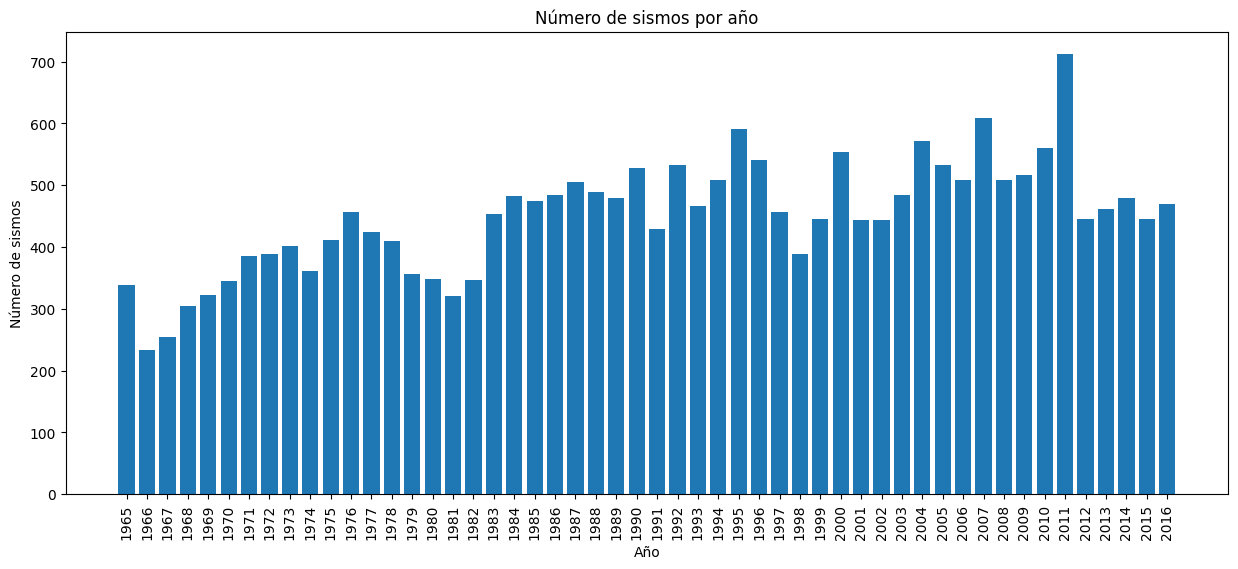

In [14]:
# prompt: en el conjunto de datos df hay un dataframe y una columna llamada "Date" que contiene la fecha organizada por dd/mm/años haz una función que cuente cuantos sismos hay en un determinado año y lo grafique en barras.

import matplotlib.pyplot as plt
def contar_sismos_por_año(df, año):
  """
  Cuenta el número de sismos en un año determinado.

  Args:
      df: DataFrame con los datos de los sismos.
      año: Año a contar los sismos.

  Returns:
      int: Número de sismos en el año especificado.
  """

  # Filtrar el DataFrame por año
  df_año = df[df["Date"].str.contains(str(año))]

  # Contar el número de filas en el DataFrame filtrado
  num_sismos = len(df_año)

  return num_sismos

# Obtener los años únicos en el DataFrame
años_unicos = df_filtrado["Date"].str.split("/", expand=True)[2].unique()

# Crear un diccionario para almacenar el número de sismos por año
sismos_por_año = {}

# Recorrer los años únicos y contar los sismos en cada año
for año in años_unicos:
  sismos_por_año[año] = contar_sismos_por_año(df_filtrado, año)

# Crear un gráfico de barras
figure = plt.figure(figsize=(15, 6))
plt.bar(sismos_por_año.keys(), sismos_por_año.values())
plt.xlabel("Año")
plt.tick_params(axis="x",rotation=90)
plt.ylabel("Número de sismos")
plt.title("Número de sismos por año")
plt.show()


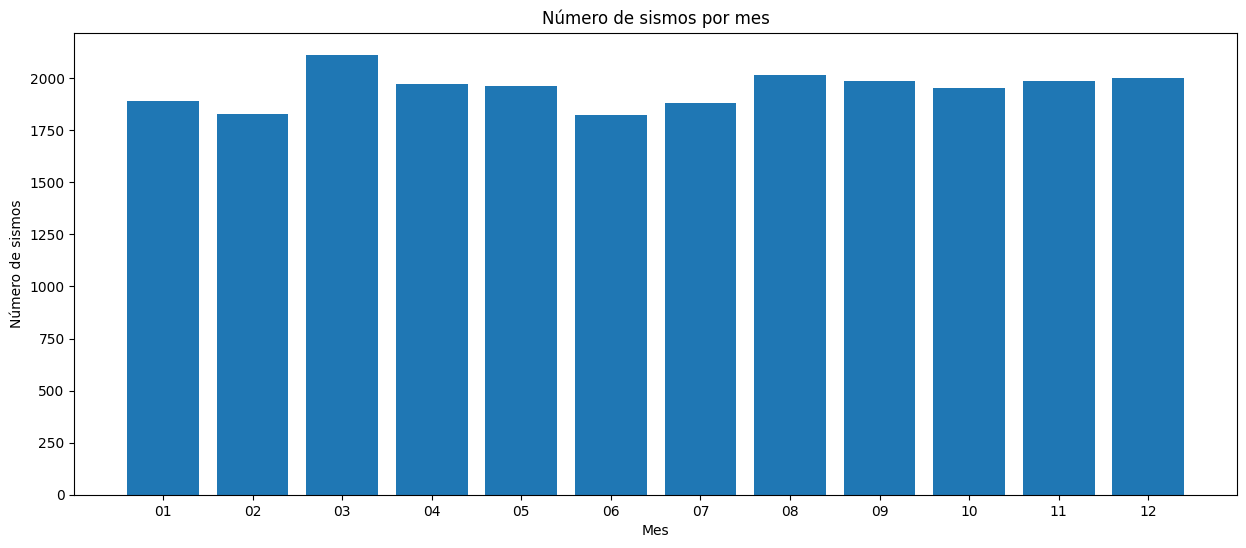

In [15]:
# prompt: en el conjunto de datos df hay un dataframe y una columna llamada "Date" que contiene la fecha organizada por mm/dd/año haz una función que cuente cuantos sismos hay en cada mes de todos los años, en el eje x van los meses del año y en el eje "y" van las frecuencias

import matplotlib.pyplot as plt
def contar_sismos_por_mes(df):
  """
  Cuenta el número de sismos en cada mes de todos los años.

  Args:
      df: DataFrame con los datos de los sismos.

  Returns:
      dict: Diccionario con los meses del año como claves y el número de sismos como valores.
  """

  # Obtener los meses únicos en el DataFrame
  meses_unicos = df_filtrado["Date"].str.split("/", expand=True)[0].unique()

  # Crear un diccionario para almacenar el número de sismos por mes
  sismos_por_mes = {}

  # Recorrer los meses únicos y contar los sismos en cada mes
  for mes in meses_unicos:
    sismos_por_mes[mes] = len(df_filtrado[df_filtrado["Date"].str.startswith(mes)])

  return sismos_por_mes

# Obtener el diccionario con los sismos por mes
sismos_por_mes = contar_sismos_por_mes(df_filtrado)

# Crear un gráfico de barras
figure = plt.figure(figsize=(15, 6))
plt.bar(sismos_por_mes.keys(), sismos_por_mes.values())
plt.xlabel("Mes")
plt.ylabel("Número de sismos")
plt.title("Número de sismos por mes")
plt.show()

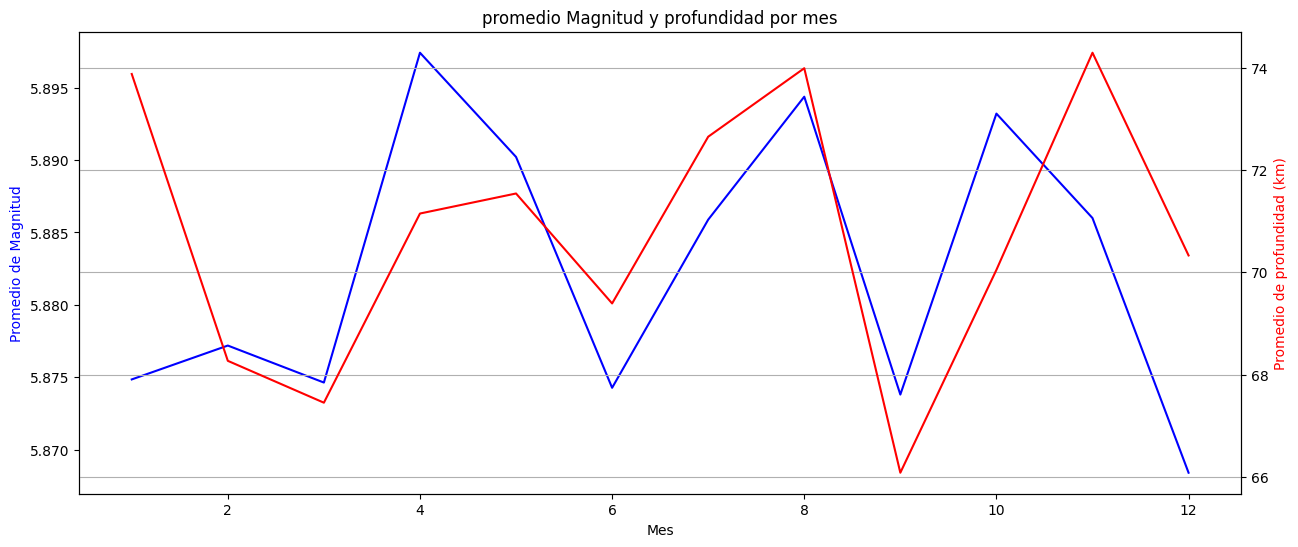

In [16]:
# prompt: en el conjunto de datos df hay un dataframe y una columna llamada "Date" que contiene la fecha organizada por mm/dd/año de la siguiente forma "01/02/1965" haz una función que me saque el promedio de la columna Magnitude y el promedio de la columna Depth por mes de todos los años y muestralo en una grafica de linea superpon las dos graficas en una sola figura con un eje secundario

import matplotlib.pyplot as plt
def calculate_monthly_averages(df):
  """
  Calculates the average magnitude and depth for each month.

  Args:
      df: DataFrame with the earthquake data.

  Returns:
      tuple: Two lists, one containing the average magnitudes for each month and one containing the average depths for each month.
  """

  # Initialize lists to store the averages
  average_magnitudes = []
  average_depths = []

  # Get unique months
  months = df_filtrado["Date"].str.split("/", expand=True)[0].unique()

  # Loop through each month
  for month in months:
    # Filter the DataFrame by month
    df_month = df_filtrado[df_filtrado["Date"].str.startswith(month)]

    # Calculate the average magnitude and depth for the month
    average_magnitude = df_month["Magnitude"].mean()
    average_depth = df_month["Depth"].mean()

    # Add the averages to the lists
    average_magnitudes.append(average_magnitude)
    average_depths.append(average_depth)

  return average_magnitudes, average_depths

# Calculate the monthly averages
average_magnitudes, average_depths = calculate_monthly_averages(df_filtrado)

# Create the figure and axes
fig, ax1 = plt.subplots(figsize=(15, 6))

# Plot the average magnitudes with the primary axis
ax1.plot(range(1, 13), average_magnitudes, label="Average Magnitude", color="blue")
ax1.set_xlabel("Mes")
ax1.set_ylabel("Promedio de Magnitud", color="blue")

# Create a secondary axis for the average depths
ax2 = ax1.twinx()

# Plot the average depths with the secondary axis
ax2.plot(range(1, 13), average_depths, label="Average Depth", color="red")
ax2.set_ylabel("Promedio de profundidad (km)", color="red")

# Set the title and show the legend
plt.title("promedio Magnitud y profundidad por mes")
plt.grid()
plt.show()


In [17]:
#escoger variables a utilizar del dataset

# vamos a serparar la hora de los minutos y segundos

"""
#forma alternativa
Time_horas=[]
for fecha in datos_de_la_matriz["Time"]:
  h=int(fecha[0:2])
  minu=int(fecha[3:5])
  seg=int(fecha[6:])
  Time_horas.append(h+minu/60+seg/3600)
"""
#convers
Time_horas=[int(fecha[0:2])+int(fecha[3:5])/60+int(fecha[6:])/3600 for fecha in df_filtrado["Time"]] #lista compresión

Date_J=[astrotools.coord.date_to_julian_day(int(fecha[6:]),int(fecha[0:2]),int(fecha[3:5])) for fecha in df_filtrado["Date"]]

df_filtrado["Date"]=Date_J
df_filtrado["Time"]=Time_horas
df_filtrado.head()

,Date,Time,Latitude,Longitude,Type,Depth,Magnitude
0,2438763,13.738333,19.246,145.616,Earthquake,131.6,6.0
1,2438765,11.496944,1.863,127.352,Earthquake,80.0,5.8
2,2438766,18.099444,-20.579,-173.972,Earthquake,20.0,6.2
3,2438769,18.828611,-59.076,-23.557,Earthquake,15.0,5.8
4,2438770,13.547222,11.938,126.427,Earthquake,15.0,5.8


In [20]:
# para ver que tipo de variable es
info = df_filtrado.dtypes
res = dict((key, "numerica") if (value == "float64" or value=="int64") else (key, "categorica") for key, value in info.items())
pd.DataFrame(res.items(), columns=["columna", "tipo"])

,columna,tipo
0,Date,numerica
1,Time,numerica
2,Latitude,numerica
3,Longitude,numerica
4,Type,categorica
5,Depth,numerica
6,Magnitude,numerica


In [21]:
# elegir los datos para la matriz de confusión
def CV_df(df):
    df_numerico = df.select_dtypes(include='number') #seleccionar las variables que son numericas
    CV = {columna : (df_numerico[columna].std() * 100) / df_numerico[columna].mean() for columna in df_numerico.columns}
    CV = pd.DataFrame([CV], columns=df_numerico.columns)
    return CV
CV_df(df_filtrado)

,Date,Time,Latitude,Longitude,Depth,Magnitude
0,0.215168,57.737002,1793.783922,316.663092,173.297955,7.192183


Text(0.5, 1.0, 'Matriz de Correlación')

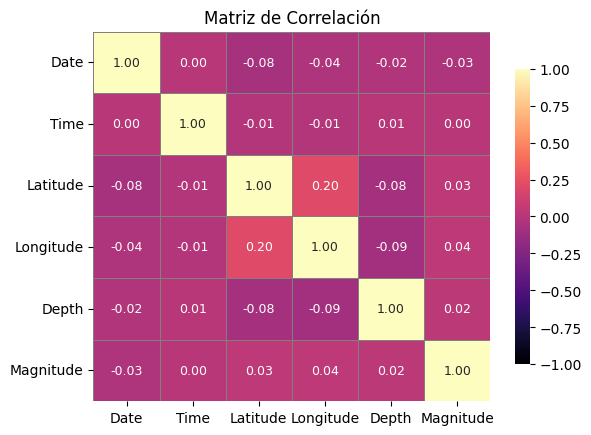

In [22]:
correlacion = df_filtrado.select_dtypes(include="number").corr()
sns.heatmap(data= correlacion,
            vmin = -1,
            vmax = 1,
            center = 0,
            annot = True,
            fmt=".2f",  # Formato de los números de correlación
            cmap="magma",  # Paleta de colores personalizada
            linewidths=0.5,  # Ancho de las líneas entre celdas
            linecolor='gray',  # Color de las líneas entre celdas
            annot_kws={"size": 9},  # Tamaño de los números de correlación
            cbar_kws={"shrink": 0.8})

plt.title('Matriz de Correlación')

In [ ]:
# crear el mapa
map2 = folium.Map()
data = list(zip(df['Latitude'],
                df['Longitude'])) # Note que pasamos una tercera columna que es el precio

In [ ]:
hm_price = HeatMap(data,
              min_opacity = 0.2,
              radius = 8,
              blur = 6)

map2.add_child(hm_price)
map2

# Hasta aquí termina el EDA

2. Cuantas filas y columnas tiene el dataset

10. Escoge al menos 5 variables para trabajar, formula preguntas o plantea situaciones que hagan uso de dichas variables para iniciar a trabajar!

cual es el tipo de amenaza para estas zonas? <br>
en que zonas se produce los mayores sismos? <br>
cual es el top 10 de los sismos a nivel de magnitud y dsitancia superficial <br>
¿Qué regiones geográficas están más propensas a experimentar sismos de gran magnitud (m>7)? <br>
¿Cómo afecta la profundidad del sismo a la cantidad de réplicas registradas? <br>
en que año se habia presentado más sismos? <br>
En que rango de horas se producen la mayor cantidad de sismos? <br>

11. Realiza gráficos de visualización para las variables de tu interés

In [ ]:
def calcular_distanciaEM(fecha,hora,latitud,longitud):
  distancia=[]
  indice_dañado=[]
  for i in range(len(fecha)):

    #se descompone la fecha del dataframe por año (a), mes (m) y dia (d)
    a=fecha[i][6:]
    m=fecha[i][:2]
    d=fecha[i][3:5]

    #se construye la fecha que se va a ingresar al programa
    fecha_a_calcular=a+"-"+m+"-"+d+"T"+hora[i]

    # Definir la ubicación de la Tierra
    ubicacion_tierra = EarthLocation(lat=latitud[i]*u.deg, lon=longitud[i]*u.deg)


    try:
      # Definir la fecha y hora
      fecha_hora = Time(fecha_a_calcular)

      # Calcular la posición de la Luna
      altaz_luna = get_body("moon",fecha_hora,location=ubicacion_tierra)

      # Calcular la distancia entre la Tierra y la Luna
      distancia_km = str(altaz_luna.distance.to(u.km))

      #guardar los valores obtenidos en la lista distancia (10 para 3 cifras decimales)
      distancia.append(float(distancia_km[:10]))

    except:
      #imprimir un error del dato
      print(f"El dato {i} hay un error, se anotará el indice para su eliminación")

      #guardar el indice con el dato dañado
      indice_dañado.append(i)

  return distancia,indice_dañado

In [ ]:
#sacar los resultados de las distancias:
resultados=calcular_distanciaEM(df["Date"],df["Time"],df["Latitude"],df["Longitude"])

print(f"los indices con defectos son {resultados[1]}")
print(f"hay {len(resultados[0])} Distancias")

El dato 3378 hay un error, se anotará el indice para su eliminación
El dato 7512 hay un error, se anotará el indice para su eliminación
El dato 20650 hay un error, se anotará el indice para su eliminación
los indices con defectos son [3378, 7512, 20650]
hay 23409 Distancias sacadas


In [ ]:
df=pd.read_csv("Sismos_significativos_Global.csv")
# ingresamos la distancia calculadas a un dataframe nuevo
df_nuevo=pd.DataFrame({"Distancia(tierra-luna)":resultados[0]})

# eliminamos los datos dañados del dataframe
df.drop(resultados[1],axis=0,inplace=True)
print("datos eliminados correctamente")

# Concatenar los DataFrames
df = pd.concat([df, df_nuevo], axis=1)

print("distancia de la luna añadida correctamente al dataframe original")
df.info()
#guardar el dataframe
#df.to_csv("sismologia_con_distancia.csv", index=False)

datos eliminados correctamente
distancia de la luna añadida correctamente al dataframe original
<class 'pandas.core.frame.DataFrame'>
Int64Index: 23412 entries, 0 to 23411
Data columns (total 22 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Date                        23409 non-null  object 
 1   Time                        23409 non-null  object 
 2   Latitude                    23409 non-null  float64
 3   Longitude                   23409 non-null  float64
 4   Type                        23409 non-null  object 
 5   Depth                       23409 non-null  float64
 6   Depth Error                 4460 non-null   float64
 7   Depth Seismic Stations      7096 non-null   float64
 8   Magnitude                   23409 non-null  float64
 9   Magnitude Type              23406 non-null  object 
 10  Magnitude Error             327 non-null    float64
 11  Magnitude Seismic Stations  2564 non-null   float

In [ ]:
df=pd.read_csv("sismologia_con_distancia.csv")
df.describe()

,Latitude,Longitude,Depth,Depth Error,Depth Seismic Stations,Magnitude,Magnitude Error,Magnitude Seismic Stations,Azimuthal Gap,Horizontal Distance,Horizontal Error,Root Mean Square,Distancia(tierra-luna)
count,23409.000000,23409.000000,23409.000000,4460.000000,7096.000000,23409.000000,327.000000,2564.000000,7298.000000,1604.000000,1156.000000,17350.000000,23409.000000
mean,1.678763,39.636726,70.748526,4.991118,275.362176,5.882558,0.071820,48.944618,44.165158,3.992660,7.662759,1.022766,385239.474705
std,30.113379,125.514881,122.605748,4.873905,162.152976,0.423084,0.051466,62.943106,32.143388,5.377262,10.430396,0.188544,15780.474012
min,-77.080000,-179.997000,-1.100000,0.000000,0.000000,5.500000,0.000000,0.000000,0.000000,0.004505,0.085000,0.000000,350525.005000
25%,-18.652000,-76.352000,14.530000,1.800000,146.000000,5.600000,0.046000,10.000000,24.100000,0.968750,5.300000,0.900000,371545.749000
50%,-3.569000,103.981000,33.000000,3.500000,255.000000,5.700000,0.059000,28.000000,36.000000,2.319500,6.700000,1.000000,386329.505000
75%,26.188000,145.027000,54.000000,6.300000,384.000000,6.000000,0.075500,66.000000,54.000000,4.724500,8.100000,1.130000,399436.033000
max,86.005000,179.998000,700.000000,91.295000,934.000000,9.100000,0.410000,821.000000,360.000000,37.874000,99.000000,3.440000,412865.664000


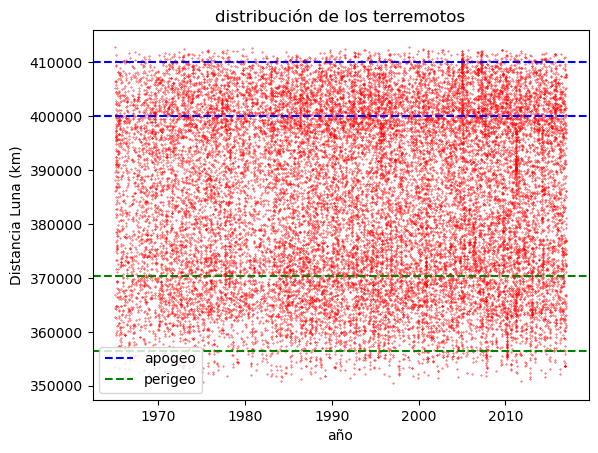

In [ ]:
df=pd.read_csv("sismologia_con_distancia.csv")
df= df[(df["Type"] == "Earthquake")] #filtrar los datos para que solo muestre los de tipo Earthquake
apogeo_max=410000 #distancia mayor de la tierra-luna
apogeo_min=400000
perigeo_min=356500 #distancia menor de la tierra-luna
perigeo_max=370400
df["Date"] = pd.to_datetime(df["Date"], format='%m/%d/%Y') #dar formato a la fecha
fig, ax = plt.subplots()
x=df["Date"]
y=df["Distancia(tierra-luna)"]
ax.scatter(x,y,color="red",s=0.1)
ax.set_xlabel("año") #nombre del eje x
ax.set_ylabel("Distancia Luna (km)") #nombre del eje y
ax.set_title("distribución de los terremotos") #titulo de la grafica
ax.axhline(y=apogeo_max, linestyle='--', color='b',label="apogeo") #hacer la linea horizontal (apogeo)
ax.axhline(y=apogeo_min, linestyle='--', color='b')
ax.axhline(y=perigeo_max, linestyle='--', color='g',label="perigeo") #hacer la linea horizontal (perigeo)
ax.axhline(y=perigeo_min, linestyle='--', color='g')
ax.legend() #añadir leyenda
plt.show()

In [ ]:
# analisis porcentual de los terremotos
P_apogeo=round(len(df[(df["Distancia(tierra-luna)"] >= apogeo_min) & (df["Distancia(tierra-luna)"] <= apogeo_max)])/len(df["Distancia(tierra-luna)"]),5)
P_perigeo=round(len(df[(df["Distancia(tierra-luna)"] >= perigeo_min) & (df["Distancia(tierra-luna)"] <= perigeo_max)])/len(df["Distancia(tierra-luna)"]),5)
P_intermedio=round(len(df[(df["Distancia(tierra-luna)"] >= perigeo_max) & (df["Distancia(tierra-luna)"] <= apogeo_min)])/len(df["Distancia(tierra-luna)"]),5)
print(f"el porcentaje de terremotos en el apogeo es de {P_apogeo*100}%")
print(f"el porcentaje de terremotos en la transición es de {P_intermedio*100}%")
print(f"el porcentaje de terremotos en el perigeo es de {P_perigeo*100}%")

el porcentaje de terremotos en el apogeo es de 21.391%
el porcentaje de terremotos en la transición es de 53.898%
el porcentaje de terremotos en el perigeo es de 20.852999999999998%


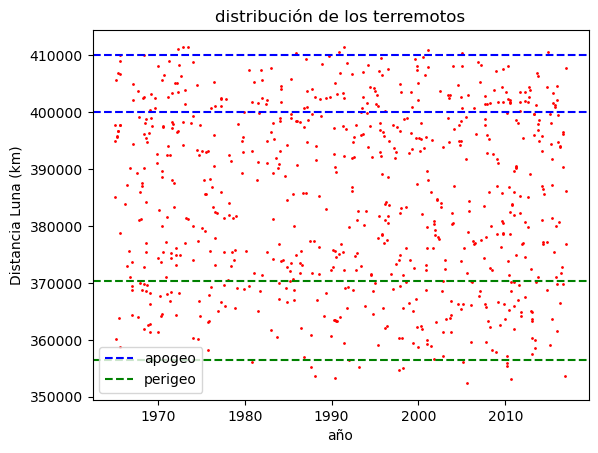

In [ ]:
df=pd.read_csv("sismologia_con_distancia.csv")
df= df[(df["Type"] == "Earthquake") & (df["Magnitude"] >= 7.0)] #filtrar los datos para que solo muestre los de tipo Earthquake
apogeo_max=410000 #distancia mayor de la tierra-luna
apogeo_min=400000
perigeo_min=356500 #distancia menor de la tierra-luna
perigeo_max=370400
df["Date"] = pd.to_datetime(df["Date"], format='%m/%d/%Y') #dar formato a la fecha
fig, ax = plt.subplots()
x=df["Date"]
y=df["Distancia(tierra-luna)"]
ax.scatter(x,y,color="red",s=1)
ax.set_xlabel("año") #nombre del eje x
ax.set_ylabel("Distancia Luna (km)") #nombre del eje y
ax.set_title("distribución de los terremotos") #titulo de la grafica
ax.axhline(y=apogeo_max, linestyle='--', color='b',label="apogeo") #hacer la linea horizontal (apogeo)
ax.axhline(y=apogeo_min, linestyle='--', color='b')
ax.axhline(y=perigeo_max, linestyle='--', color='g',label="perigeo") #hacer la linea horizontal (perigeo)
ax.axhline(y=perigeo_min, linestyle='--', color='g')
ax.legend() #añadir leyenda
plt.show()

In [ ]:
# analisis porcentual de los terremotos
P_apogeo=round(len(df[(df["Distancia(tierra-luna)"] >= apogeo_min) & (df["Distancia(tierra-luna)"] <= apogeo_max)])/len(df["Distancia(tierra-luna)"]),5)
P_perigeo=round(len(df[(df["Distancia(tierra-luna)"] >= perigeo_min) & (df["Distancia(tierra-luna)"] <= perigeo_max)])/len(df["Distancia(tierra-luna)"]),5)
P_intermedio=round(len(df[(df["Distancia(tierra-luna)"] >= perigeo_max) & (df["Distancia(tierra-luna)"] <= apogeo_min)])/len(df["Distancia(tierra-luna)"]),5)
print(f"el porcentaje de terremotos en el apogeo es de {P_apogeo*100}%")
print(f"el porcentaje de terremotos en la transición es de {P_intermedio*100}%")
print(f"el porcentaje de terremotos en el perigeo es de {P_perigeo*100}%")

el porcentaje de terremotos en el apogeo es de 19.648%
el porcentaje de terremotos en la transición es de 55.556000000000004%
el porcentaje de terremotos en el perigeo es de 21.409%
